In [150]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

le modele:

f(x) = ax + b


cost function:

1/2m * (XH-Y)'(XH-Y)


grad :

grad = 1/m * X'(X.H - y )


learning :

H = H - alpha * grad

In [151]:
def model(X,H):
    return X.dot(H)

In [152]:
def cost(X,H,Y):
    m = len(Y)
    return (1/(2*m))*(X.dot(H)-Y).T.dot(model(X,H)-Y)

In [153]:
def gradient(X,H,y):
    m = len(y)
    return (1/m)*X.T.dot(X.dot(H)-y)

In [154]:
def gradient_decent(X,H,y,alpha,nb_iter):
    for i in range(nb_iter):
        grad = gradient(X=X , H= H , y=y)
        H = H - alpha * grad
    return H
        
    

In [155]:
nb_iter = 1000
alpha = 0.01
# random state
np.random.seed(0)

In [156]:
X , y = make_regression(n_samples=100,n_features=1,noise=10)

In [157]:
print(X[:5])
print(y[:5])

[[-0.35955316]
 [ 0.97663904]
 [ 0.40234164]
 [-0.81314628]
 [-0.88778575]]
[-19.95588561  21.33977271  11.55689458 -16.34206917 -35.70063849]


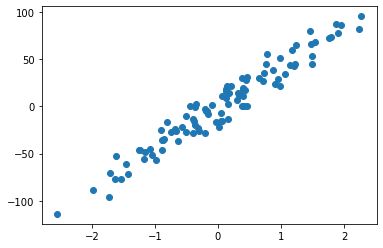

In [158]:
plt.scatter(X,y)

In [159]:
# reshaping y
y = y.reshape(y.shape[0],1)
y[:5]

array([[-19.95588561],
       [ 21.33977271],
       [ 11.55689458],
       [-16.34206917],
       [-35.70063849]])

In [160]:
# init theta
H = np.random.rand(2,1)
H

array([[0.27032791],
       [0.1314828 ]])

In [161]:
X_oned = np.hstack((X,np.ones(X.shape)))
X_oned[:5]

array([[-0.35955316,  1.        ],
       [ 0.97663904,  1.        ],
       [ 0.40234164,  1.        ],
       [-0.81314628,  1.        ],
       [-0.88778575,  1.        ]])

In [162]:
# learning
H = gradient_decent(X= X_oned,y=y,H=H,alpha=alpha,nb_iter=nb_iter)
H

array([[42.61760174],
       [-0.81306881]])

In [180]:
H=gradient(X=X_oned,H=H,y=y)

In [176]:
H

array([[-43.39947915],
       [ -1.73390557]])

In [182]:
pred = model(X= X_oned , H = H)

In [178]:
cost(X_oned,H,y)

array([[3833.65284643]])

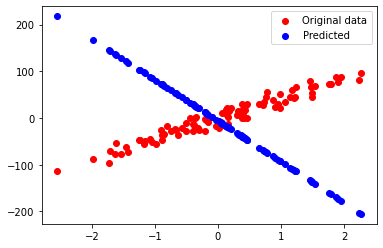

In [183]:
fig , ax = plt.subplots()
ax.scatter(X,y,color="r",label="Original data")
ax.scatter(X,pred,color="b",label="Predicted")
ax.legend()
plt.show()